In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [108]:
df = pd.read_csv("iris.csv")

In [109]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


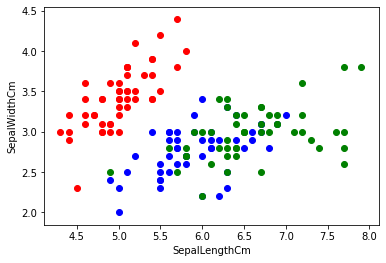

In [110]:
for n in range(0,150):
 if df['variety'][n] == 'Setosa':
    
    plt.scatter(df['sepal.length'][n],df['sepal.width'][n],color='red')
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    
 elif df['variety'][n] == 'Versicolor':
    
    plt.scatter(df['sepal.length'][n],df['sepal.width'][n],color='blue')
    
 else:
    plt.scatter(df['sepal.length'][n],df['sepal.width'][n],color='green')

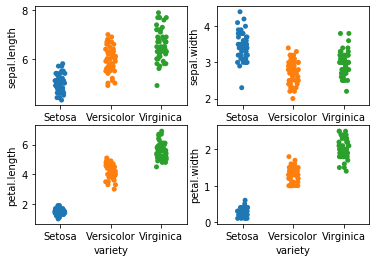

In [111]:
plt.subplot(2,2,1)
sns.stripplot(x="variety", y="sepal.length", data=df, jitter=True)
plt.subplot(2,2,2)
sns.stripplot(x="variety", y="sepal.width", data=df, jitter=True)
plt.subplot(2,2,3)
sns.stripplot(x="variety", y="petal.length", data=df, jitter=True)
plt.subplot(2,2,4)
sns.stripplot(x="variety", y="petal.width", data=df, jitter=True)

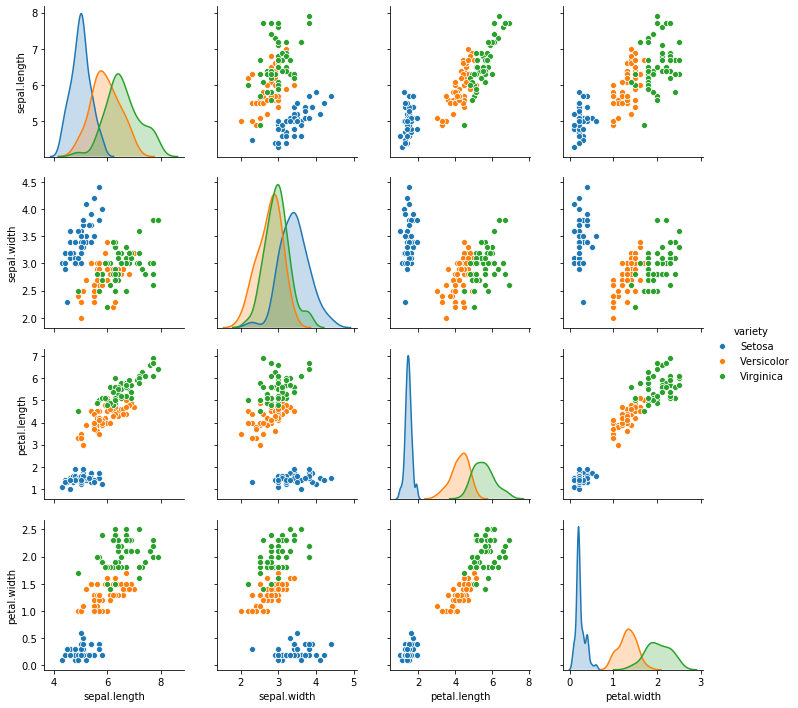

In [130]:
sns.pairplot(df,hue='variety')

In [113]:
X=df.iloc[:,0:4]
y=df.iloc[:,4]

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [115]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



In [116]:
#Applying naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train_std, y_train)
print('The accuracy of the Naive bayes classifier on training data is {:.2f}'.format(nvclassifier.score(X_train_std, y_train)))
print('The accuracy of the Naive bayes classifier on test data is {:.2f}'.format(nvclassifier.score(X_test_std, y_test)))

The accuracy of the Naive bayes classifier on training data is 0.95
The accuracy of the Naive bayes classifier on test data is 0.93


In [117]:
#Applying logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_std, y_train)
print('The accuracy of the logistic regression classifier on training data is {:.2f}'.format(logisticRegr.score(X_train_std, y_train)))
print('The accuracy of the logistic regression classifier on test data is {:.2f}'.format(logisticRegr.score(X_test_std, y_test)))

The accuracy of the logistic regression classifier on training data is 0.91
The accuracy of the logistic regression classifier on test data is 0.82


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [118]:
#Applying svm
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, C=1.0)
svm.fit(X_train_std, y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 0.98


In [119]:
#Applying svm
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 0.96


In [120]:
#Applying Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))


The accuracy of the Knn classifier on training data is 0.94
The accuracy of the Knn classifier on test data is 0.98


In [132]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X_train_std, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X_test_std, y_test)))

The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.96


In [133]:
#Applying Decision Tree with entropy
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')

#Train DT based on scaled training set
decision_tree.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X_train_std, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X_test_std, y_test)))

The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.96


In [122]:
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X_train_std, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X_test_std, y_test)))


The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


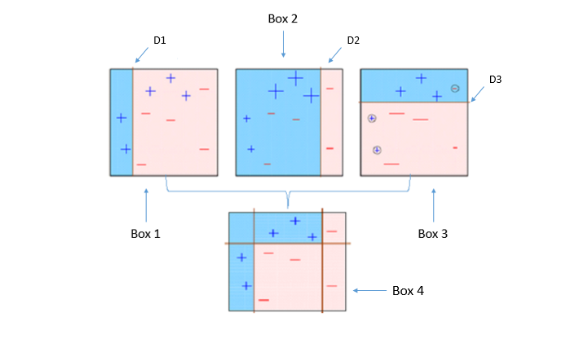

In [127]:
from IPython.display import Image
Image("xgboost.png")

In [134]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_clf.score(X_train_std, y_train)))
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(X_test_std, y_test)))

The accuracy of the XGBoost classifier on training data is 1.00
The accuracy of the XGBoost classifier on test data is 0.96


regularization, 
parallel processing, 
handling missing values internally